In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd

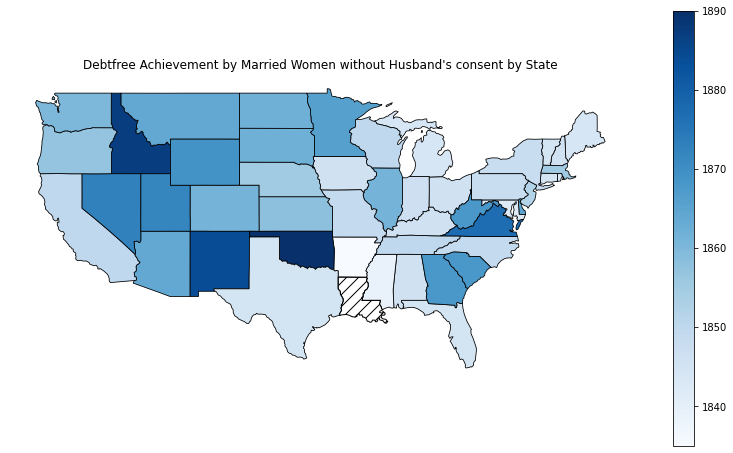

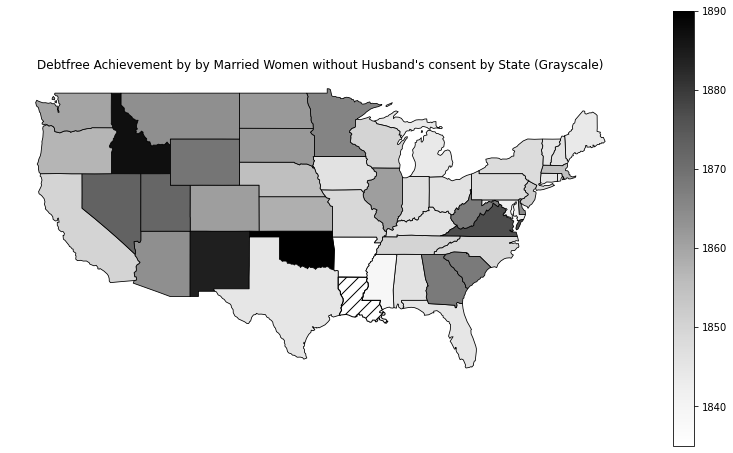

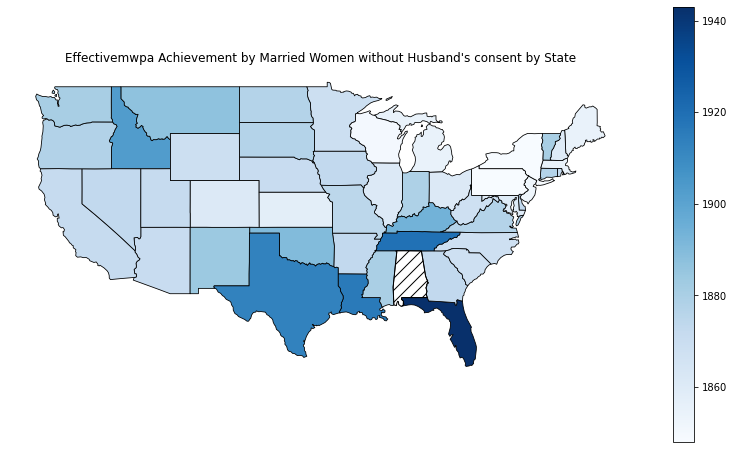

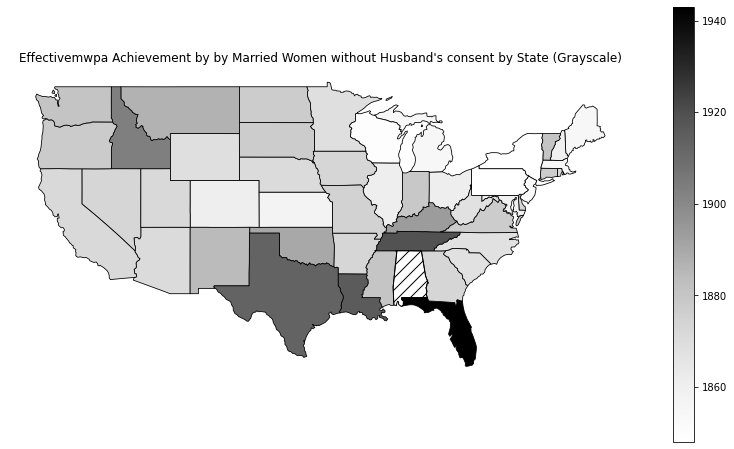

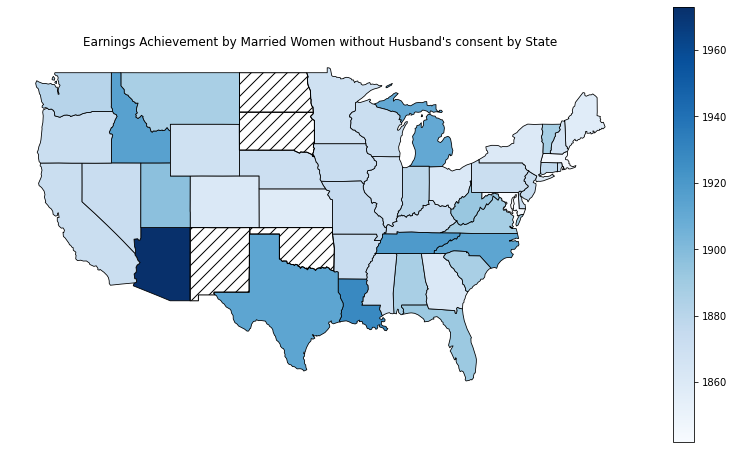

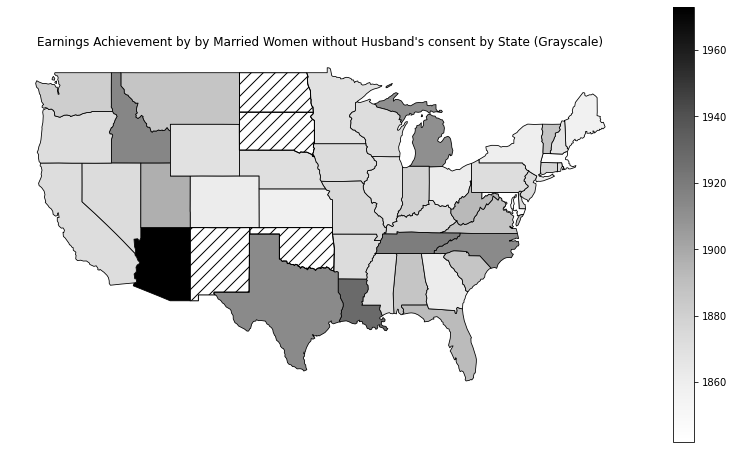

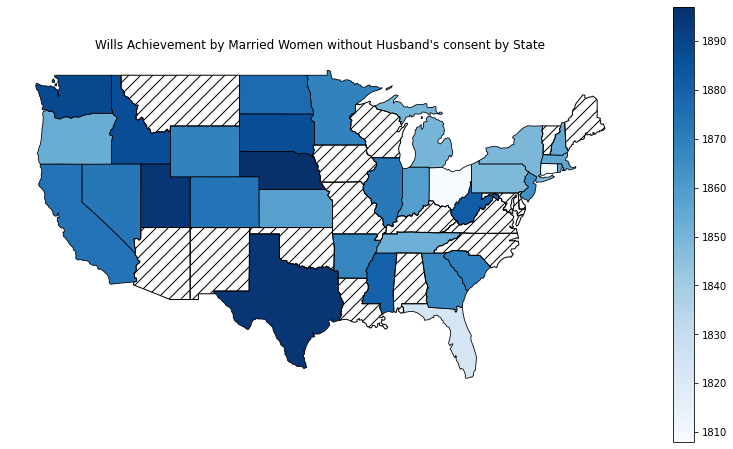

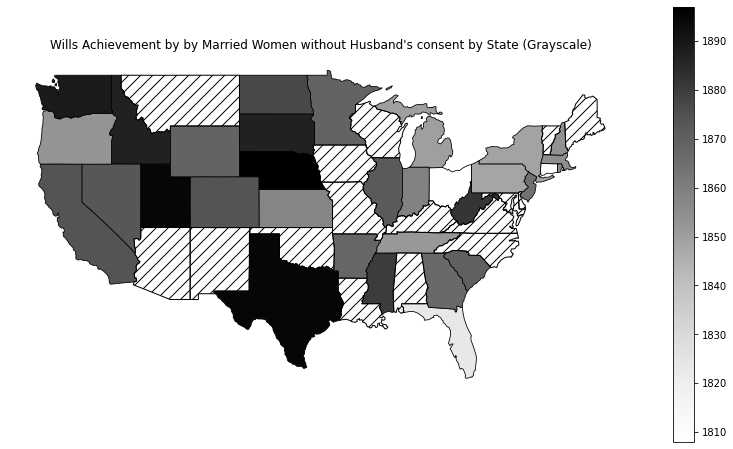

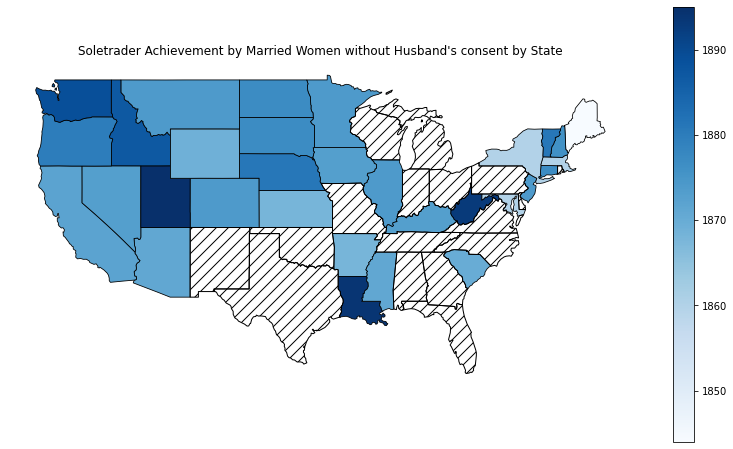

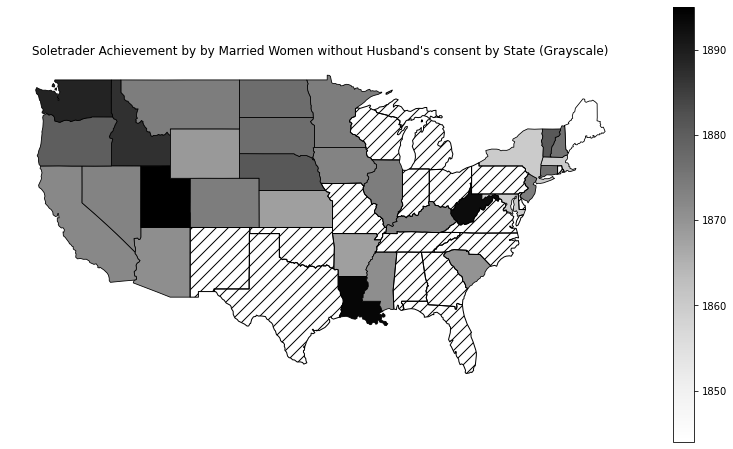

In [4]:
def the_48():
    
    """
    Generates choropleth maps for milestones related to married women's rights by state
    
    Args: n/a
    
    Returns: n/a
    """
    
    #load data
    data = pd.read_csv('SturmData.csv')
    
    us_states = gpd.read_file("us-states.json")
    us_states = us_states.rename(columns={'id':'fips'})
    us_states['fips'] = us_states['fips'].astype(int)
    
#     #inspect columns
#     us_states.info()
#     data.info()
    
    #merge data
    combined_df = pd.merge(us_states, data, on = 'fips', how='inner')
    
#     combined_df.info()

    combined_df.replace('', pd.NA, inplace=True)
#     print(combined_df.head())

    milestone_columns = ['debtfree', 'effectivemwpa', 'earnings', 'wills', 'soletrader']
    
    for column in milestone_columns:
        fig, ax = plt.subplots(1,1,figsize = (15,8))
        combined_df.plot(column=column, cmap='Blues', linewidth=0.8, edgecolor='black',
                    ax=ax, legend=True)
        combined_df[combined_df[column].isnull()].plot(ax=ax, color='none', edgecolor='black',
                                                      hatch='//')
    
        legend = ax.get_legend()
        if legend:
            legend.set_bbox_to_anchor((1.05, 0.5))
            legend.set_title('Year')
    
        ax.set_title(f'{column.capitalize()} Achievement by Married Women without Husband\'s consent by State')
        ax.set_axis_off()

        plt.subplots_adjust(right=0.85)
        
        plt.show()
        
        #the blue color map would also work in a grey scale publication as there is cross hatching and the colors 
        #would appear distinctly in grey scale to show the changes in years, but just in case I also created 
        #the map in grey scale
        
        #grey scale version
        fig, ax = plt.subplots(1, 1, figsize=(15, 8))
        
        combined_df.plot(column=column, cmap='Greys', linewidth=0.8, edgecolor='black',
                         ax=ax, legend=True)
        
        combined_df[combined_df[column].isnull()].plot(ax=ax, color='none', edgecolor='black',
                                                       hatch='//')
        
        legend = ax.get_legend()
        if legend:
            legend.set_bbox_to_anchor((1.05, 0.5))
            legend.set_title('Year')
            
        ax.set_title(f'{column.capitalize()} Achievement by by Married Women without Husband\'s consent by State (Grayscale)')
        ax.set_axis_off()
        
        plt.subplots_adjust(right=0.85)
        
        plt.show()
        
if __name__ == "__main__":
    the_48()